<div style="line-height:1.2;">

<h1 style="color:#0FA345; margin-bottom: 0.2em;">Random Forest Classification 2 </h1>
<h4 style="margin-top: 0.2em; margin-bottom: 0.5em;"> Examples with sklearn RandomForestClassifier. Focus on plots and Confusion Matrix. </h4>

</div>

<div style="line-height:1.4; margin-top: 0.2em;">
<span>
    <h3 style="color: lightblue; display: inline; margin-right: 0.5em;">Keywords:</h3>
    imblearn + seaborn countplot; lmplot; jointplot + seaborn available cmap + perform random over-samplingby (bootstrap)
</span>
</div>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler

In [39]:
df_loans=pd.read_csv('./data/loan_dataset_for_example_2.csv')
df_loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [40]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [41]:
df_loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<h2 style="color:#0FA345 "> Plots </h2>

Text(0.5, 0, 'FICO')

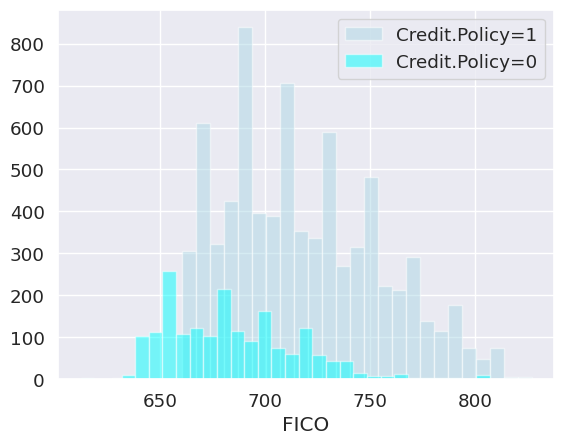

In [42]:
df_loans[df_loans['credit.policy']==1]['fico'].hist(alpha=0.5, color='lightblue', bins=30, label='Credit.Policy=1')
df_loans[df_loans['credit.policy']==0]['fico'].hist(alpha=0.5, color='cyan', bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

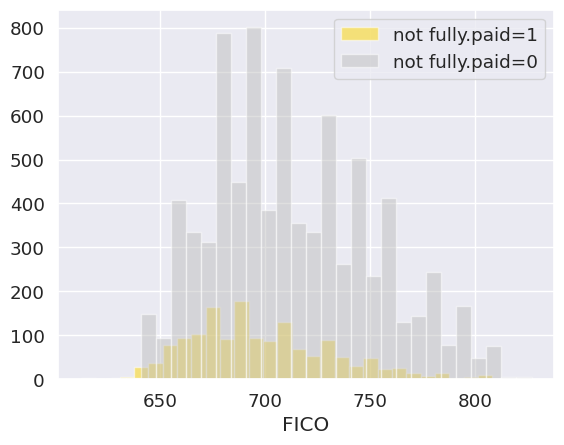

In [43]:
df_loans[df_loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='gold', bins=30, label='not fully.paid=1')
df_loans[df_loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='silver', bins=30, label='not fully.paid=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

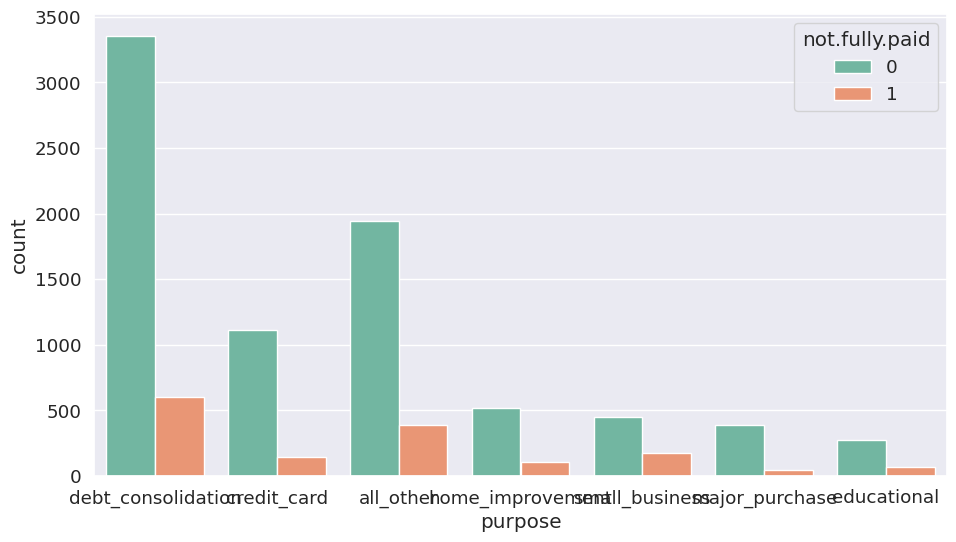

In [44]:
# Countplot of loans by purpose
# Availavle palette => 'Set1','Set2','Set3'
plt.figure(figsize=(11,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df_loans, palette='Set2')
plt.show()

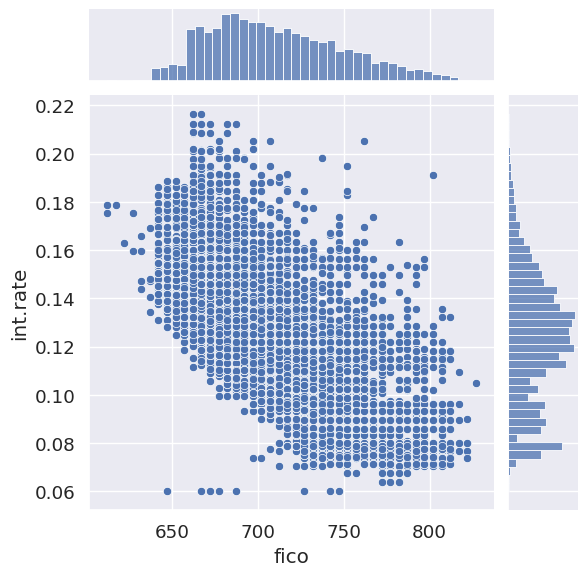

In [45]:
# Jointplot to check FICO score and interest rate trends 
sns.jointplot(x='fico', y='int.rate', data=df_loans, kind='scatter')
plt.show()

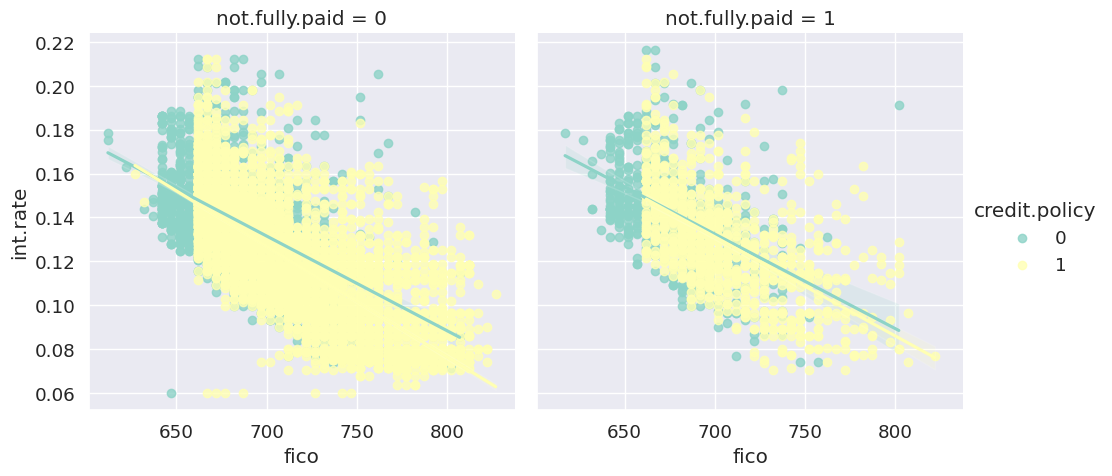

In [46]:
# Lmplots to check the not.fully.paid and credit.policy trends
sns.lmplot(x='fico', y='int.rate', data=df_loans, hue='credit.policy', col='not.fully.paid', palette='Set3')

In [47]:
df_loans['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [48]:
cat_feats=['purpose']

In [49]:
# Split "purpose" column into 6 distinctive columns
final_data=pd.get_dummies(df_loans,columns=cat_feats, drop_first=True )
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [50]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [51]:
# Instance of the DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
# Train
dtree.fit(X_train, y_train);

In [52]:
predictions = dtree.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0])

<h4 style="color:#0FA345 "> => Metrics </h4>

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [54]:
conf1 = confusion_matrix(y_test,predictions)
conf1

array([[2001,  430],
       [ 342,  101]])

<h4 style="color:#0FA345 "> Recap: </h4> 
Seaborn avalable 'cmap' = YlGnBu, viridis, RdBu_r, copper, Blues, cubehelix, Greens, cool, OrRd, BuPu

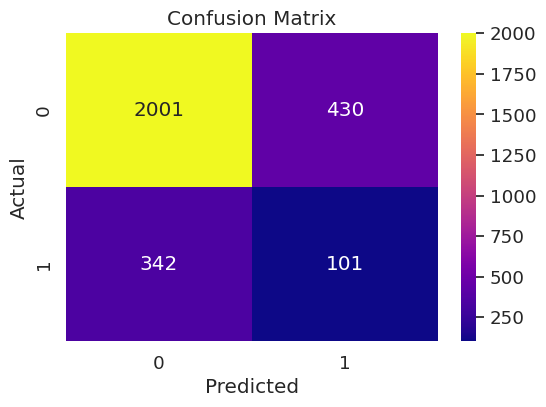

In [55]:
########### Visualize the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(conf1, annot=True, fmt='d', cmap='plasma')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h4 style="color:#0FA345 "> => Training the Random Forest model </h4>

In [56]:
# Instance of the RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=600, criterion='log_loss')

rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=600)

In [57]:
predictions = rfc.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.58      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.47      2874
weighted avg       0.81      0.85      0.78      2874



In [59]:
conf2 = confusion_matrix(y_test, predictions)
conf2

array([[2426,    5],
       [ 436,    7]])

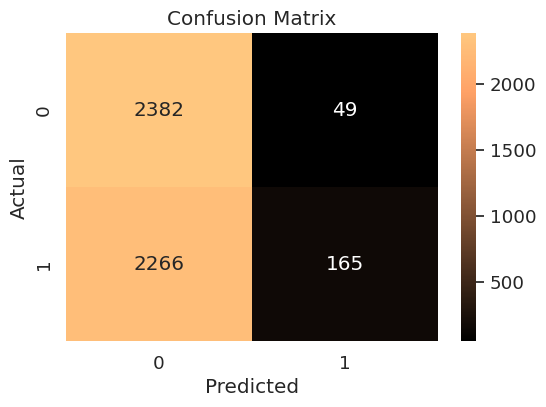

In [77]:
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(conf2, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h4 style="color:#0FA345 "> => Standardize features by removing the mean and scaling to unit variance </h4>

In [67]:
""" Standard score of a sample x is calculated as: z = (x - u) / s
Where:
- u is the mean of the training samples
- s is the standard deviation of the training samples.
"""
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rfc = RandomForestClassifier(n_estimators=600, criterion='log_loss')
rfc.fit(X_train_scaled, y_train)
predictions_scaled = rfc.predict(X_test_scaled)

print(classification_report(y_test, predictions_scaled))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.67      0.50      0.47      2874
weighted avg       0.79      0.85      0.78      2874



In [63]:
conf2 = confusion_matrix(y_test, predictions)
conf2

array([[2426,    5],
       [ 436,    7]])

<h4 style="color:#0FA345 "> => Improve model handling Class Imbalance with imbalanced-learn </h4>

In [72]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = ros.fit_resample(X_test_scaled, y_test)

rfc_rand = RandomForestClassifier(n_estimators=600, criterion='log_loss')
rfc_rand.fit(X_train_resampled, y_train_resampled)
predictions_random = rfc_rand.predict(X_test_resampled)
print(classification_report(y_test_resampled, predictions_random))

              precision    recall  f1-score   support

           0       0.51      0.98      0.67      2431
           1       0.77      0.07      0.12      2431

    accuracy                           0.52      4862
   macro avg       0.64      0.52      0.40      4862
weighted avg       0.64      0.52      0.40      4862



In [75]:
conf4 = confusion_matrix(y_test_resampled, predictions_random)
conf4

array([[2382,   49],
       [2266,  165]])

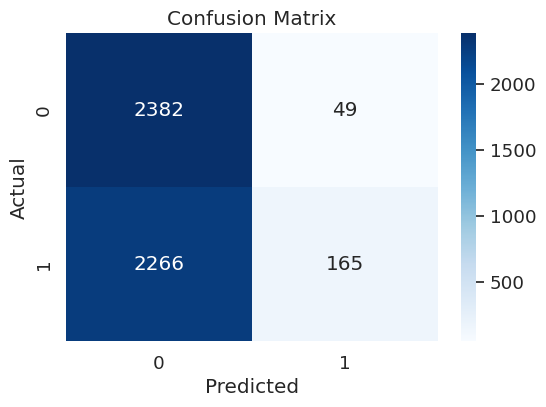

In [76]:
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(conf4, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()